# QUES 1
**Data Preparation: Read the dataset using the “pandas” library. Can you identify any missing
data both row and column wise in the dataset? Handle them in an appropriate way. Explain
how you did it along with a justification for your choices.**


In [222]:
#import pandas library 
import pandas as pd

# import numpy with alias np
import numpy as np

import matplotlib.pyplot as plt

#load the data
seed_data = pd.read_csv(filepath_or_buffer = 'Seed_dataset_v1.csv')

# Calculate the total number of entries (rows)
total_entries = seed_data.shape[0]
print("Total number of entries:", total_entries)

#view the first few rows of the data
seed_data.head(20)

Total number of entries: 210


,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,Kama
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,Kama
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,Kama
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,Kama


**Description of the above data** <br> <br>
The examined group comprises of kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian. It has totally 210 kernels with each wheat variety being represented by 70
specimens. <br> <BR>
The above table shows the the 7 geometric parameters of wheat kernels:
1. area  
2. perimeter  
3. compactness 
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.

In [223]:
seed_data.isna().sum()

area                    1
perimeter               1
compactness             7
lengthOfKernel          1
widthOfKernel           1
asymmetryCoefficient    2
lengthOfKernelGroove    8
seedType                0
dtype: int64

From the above table, it is evident that all columns (except seedType) have missing values.</br>

HOW TO HANDLE MISSING VALUES IN THIS CASE?<br>
Impute the missing data using the best estimate of the missing values based on non-missing values.<br><br>


METHOD OF IMPUTATION FOR COLUMNS: <br>
Mean imputation could be suitable for these columns because:
*  Small amounts of missing data: <br>
There are only a few missing values, thus mean imputation may have only a minimal impact on the overall dataset. <br> <BR>
*  Insignificant number of outliers:<br>
From the boxplots shown below, it is evident that the given columns have very few or no outliers at all. Thus, mean impuation would not introduce significant bias into the data.<br> <br>

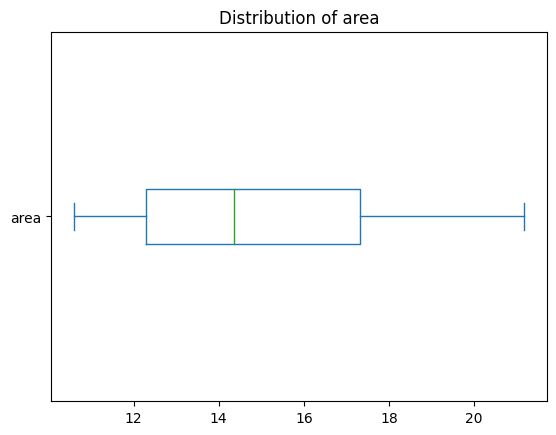

In [224]:
seed_data["area"].plot.box(vert=False, title="Distribution of area");


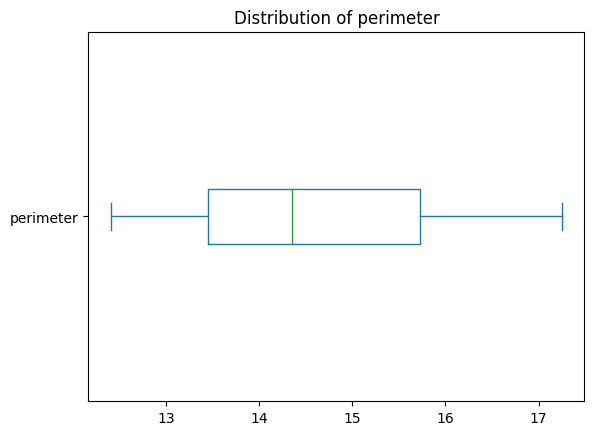

In [225]:
seed_data["perimeter"].plot.box(vert=False, title="Distribution of perimeter");

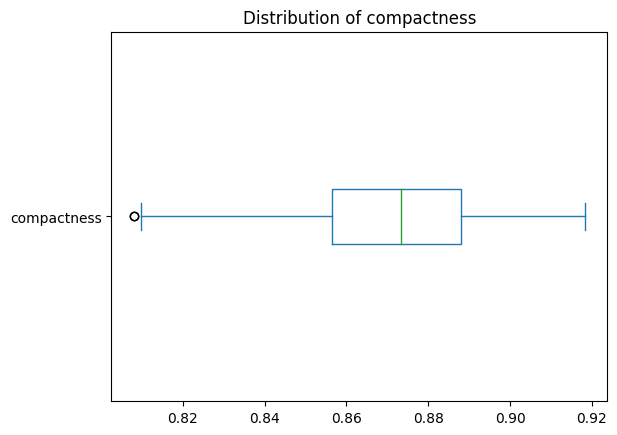

In [226]:
seed_data["compactness"].plot.box(vert=False, title="Distribution of compactness");

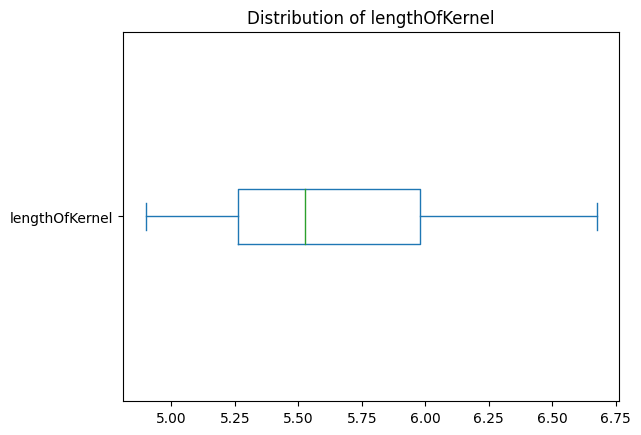

In [227]:
seed_data["lengthOfKernel"].plot.box(vert=False, title="Distribution of lengthOfKernel");

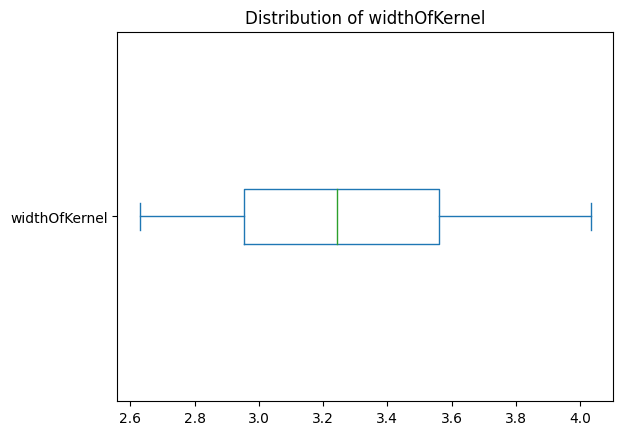

In [228]:
seed_data["widthOfKernel"].plot.box(vert=False, title="Distribution of widthOfKernel");

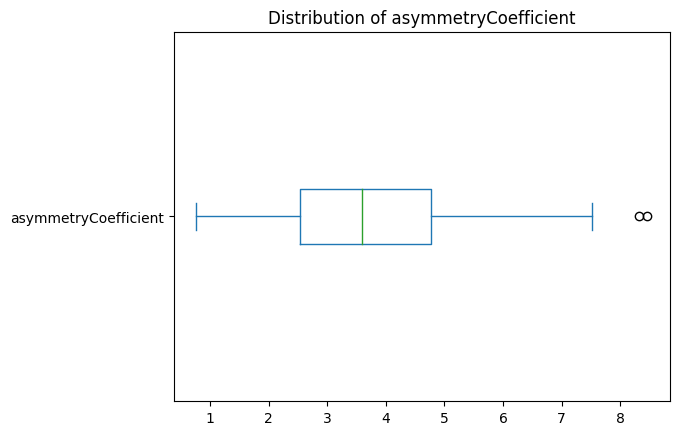

In [229]:
seed_data["asymmetryCoefficient"].plot.box(vert=False, title="Distribution of asymmetryCoefficient");

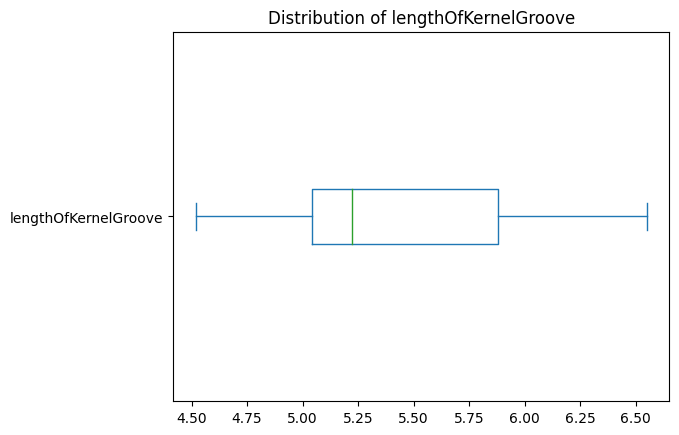

In [230]:
seed_data["lengthOfKernelGroove"].plot.box(vert=False, title="Distribution of lengthOfKernelGroove");

**<u>MEAN IMPUTATION ON area COLUMN</u>**

Let's impute `area` using mean imputation. Here we'll first calculate mean of the non-missing values, round it to nearest integer, and then fill missing values with the mean.

In [231]:
# mean of non-missing area values
non_missing_area_mean = np.round(seed_data[seed_data.notna()]["area"].mean())

# fill missing area values with the above mean
seed_data["area"].fillna(non_missing_area_mean, inplace=True)

# verify that there no missing values in the column
seed_data["area"].isna().sum()

0

**<u> MEAN IMPUTATION ON perimeter COLUMN </u>**

Repeat the same process as above to impute the missing values for perimeter.

In [232]:
# mean of non-missing perimeter values
non_missing_perimeter_mean = np.round(seed_data[seed_data.notna()]["perimeter"].mean())

# fill missing perimeter values with the above mean
seed_data["perimeter"].fillna(non_missing_perimeter_mean, inplace=True)

# verify that there no missing values in the column
seed_data["perimeter"].isna().sum()


0

**<u> MEAN IMPUTATION ON lengthOfKernel COLUMN </u>**

In [233]:
# mean of non-missing lengthOfKernel values
non_missing_lengthOfKernel_mean = np.round(seed_data[seed_data.notna()]["lengthOfKernel"].mean())

# fill missing perimeter values with the above mean
seed_data["lengthOfKernel"].fillna(non_missing_lengthOfKernel_mean, inplace=True)

# verify that there no missing values in the column
seed_data["lengthOfKernel"].isna().sum()


0

**<u> MEAN IMPUTATION ON widthOfKernel COLUMN </u>**

In [234]:
# mean of non-missing widthOfKernel values
non_missing_widthOfKernel_mean = np.round(seed_data[seed_data.notna()]["widthOfKernel"].mean())

# fill missing widthOfKernel values with the above mean
seed_data["widthOfKernel"].fillna(non_missing_widthOfKernel_mean, inplace=True)

# verify that there no missing values in the column
seed_data["widthOfKernel"].isna().sum()

0

**<u> MEAN IMPUTATION ON asymmetryCoefficient COLUMN </u>**

In [235]:
# mean of non-missing asymmetryCoefficient values
non_missing_asymmetryCoefficient_mean = np.round(seed_data[seed_data.notna()]["asymmetryCoefficient"].mean())

# fill missing asymmetryCoefficient values with the above mean
seed_data["asymmetryCoefficient"].fillna(non_missing_asymmetryCoefficient_mean, inplace=True)

# verify that there no missing values in the column
seed_data["asymmetryCoefficient"].isna().sum()

0

**<u> MEAN IMPUTATION ON compactness COLUMN </u>**

In [236]:
# mean of non-missing compactness values
non_missing_compactness_mean = np.round(seed_data[seed_data.notna()]["compactness"].mean())

# fill missing compactness values with the above mean
seed_data["compactness"].fillna(non_missing_compactness_mean, inplace=True)

# verify that there no missing values in the column
seed_data["compactness"].isna().sum()

0

**<u> MEAN IMPUTATION ON lengthOfKernelGroove COLUMN </u>**

In [237]:
# mean of non-missing lengthOfKernelGroove values
non_missing_lengthOfKernelGroove_mean = np.round(seed_data[seed_data.notna()]["lengthOfKernelGroove"].mean())

# fill missing compactness values with the above mean
seed_data["lengthOfKernelGroove"].fillna(non_missing_lengthOfKernelGroove_mean, inplace=True)

# verify that there no missing values in the column
seed_data["lengthOfKernelGroove"].isna().sum()

0

In [238]:
# verify that missing values are imputed in 
seed_data.isna().sum()

area                    0
perimeter               0
compactness             0
lengthOfKernel          0
widthOfKernel           0
asymmetryCoefficient    0
lengthOfKernelGroove    0
seedType                0
dtype: int64

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**



# QUES 2
**Exploratory Data Analysis (EDA): Perform a detailed univariate and bivariate EDA for all
relevant columns in the dataset. Produce plots, report your observation for each plot and
findings clearly.**

In [239]:
# shape of data
seed_data.shape

(210, 8)

It can be observed that the dataset has 210 rows and 8 columns.

In [240]:
# concise summary of the dataset
seed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   lengthOfKernel        210 non-null    float64
 4   widthOfKernel         210 non-null    float64
 5   asymmetryCoefficient  210 non-null    float64
 6   lengthOfKernelGroove  210 non-null    float64
 7   seedType              210 non-null    object 
dtypes: float64(7), object(1)
memory usage: 13.3+ KB


##    UNIVARIATE EDA

Exploring each column in isolation to identify its distribution and/or data quality issues:

**area COLUMN**

In [241]:
# summarize area
seed_data["area"].describe()

count    210.000000
mean      14.865714
std        2.898581
min       10.590000
25%       12.315000
50%       14.375000
75%       17.305000
max       21.180000
Name: area, dtype: float64

***OBSERVATIONS*** <br>
* The 'area' values are in a moderate range and relatively symmetric distribution. 
* A lower standard deviation suggests less variability in the "area" values around the mean.
* The values lie between 10.59 to 21.18 units.

In [242]:
# view unique area values
seed_data["area"].unique()

array([15.26, 14.88, 14.29, 13.84, 16.14, 14.38, 14.69, 14.11, 16.63,
       16.44, 14.03, 13.89, 13.78, 13.74, 14.59, 13.99, 15.69, 14.7 ,
       12.72, 14.16, 15.88, 12.08, 15.01, 16.19, 13.02, 12.74, 13.45,
       13.16, 15.49, 14.09, 13.94, 15.05, 16.12, 16.2 , 17.08, 14.8 ,
       14.28, 13.54, 13.5 , 15.5 , 15.11, 13.8 , 15.36, 14.99, 14.79,
       14.86, 14.43, 15.78, 14.49, 14.33, 14.52, 15.03, 14.46, 14.92,
       15.38, 12.11, 11.42, 11.23, 12.36, 13.22, 12.78, 12.88, 14.34,
       14.01, 14.37, 12.73, 17.63, 16.84, 17.26, 19.11, 16.82, 16.77,
       17.32, 20.71, 18.94, 17.12, 16.53, 18.72, 20.2 , 19.57, 19.51,
       18.27, 18.88, 18.98, 21.18, 20.88, 20.1 , 18.76, 18.81, 18.59,
       18.36, 16.87, 19.31, 18.17, 16.41, 17.99, 19.46, 19.18, 18.95,
       18.83, 18.85, 19.94, 18.55, 18.45, 19.38, 19.13, 19.14, 20.97,
       19.06, 18.96, 19.15, 18.89, 20.03, 20.24, 18.14, 16.17, 18.43,
       15.99, 18.75, 18.65, 17.98, 20.16, 17.55, 18.3 , 16.16, 15.56,
       17.36, 15.57,

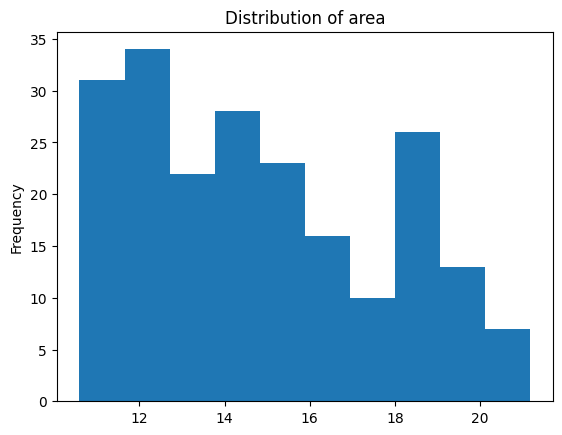

In [243]:
# histogram of 'area'
seed_data["area"].plot.hist(grid=False, bins=10, title="Distribution of area");

***OBSERVATION*** <br>
The area of most seeds is between 10 - 15 units and also between 18 - 19 units. 

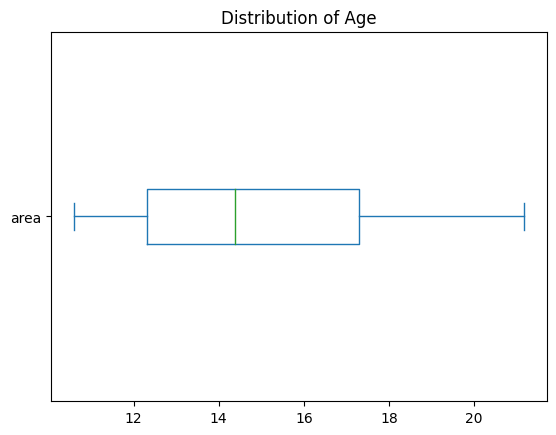

In [244]:
# boxplot of 'area'
seed_data["area"].plot.box(vert = False, title = "Distribution of Age");

***OBSERVATION*** <br>
There are no outliers as evident from the boxplot. 

**perimeter COLUMN**

In [245]:
# summarize perimeter column
seed_data["perimeter"].describe()

count    210.000000
mean      14.570857
std        1.298995
min       12.410000
25%       13.452500
50%       14.360000
75%       15.715000
max       17.250000
Name: perimeter, dtype: float64

***OBSERVATIONS*** <BR>
* 'perimeter' values in the dataset have a relatively small range (between 12 - 17 units).
* It appears to have a relatively symmetric distribution. 
* The standard deviation indicates low variability around the mean. 

In [246]:
# view unique values
seed_data['perimeter'].unique()

array([14.84, 14.57, 14.09, 13.94, 14.99, 14.21, 14.49, 14.1 , 15.46,
       15.25, 14.85, 14.16, 14.02, 14.06, 14.05, 14.28, 13.83, 14.75,
       13.57, 14.4 , 14.26, 14.9 , 13.23, 14.76, 15.16, 13.76, 13.67,
       14.18, 13.82, 14.94, 14.41, 14.17, 14.68, 15.  , 15.27, 15.38,
       14.52, 13.85, 13.55, 14.86, 14.54, 14.04, 14.56, 14.67, 14.91,
       14.61, 14.6 , 14.77, 14.35, 14.43, 13.47, 12.86, 12.63, 13.19,
       13.84, 13.5 , 14.37, 14.29, 14.39, 13.75, 15.98, 15.67, 15.73,
       16.26, 15.51, 15.62, 15.91, 17.23, 16.49, 15.55, 15.34, 16.19,
       16.89, 16.74, 16.71, 16.09, 16.66, 17.21, 17.05, 16.99, 16.2 ,
       16.29, 16.05, 16.52, 15.65, 16.59, 16.57, 16.34, 15.86, 16.5 ,
       16.63, 16.42, 16.17, 16.92, 16.22, 16.12, 16.72, 16.31, 16.61,
       17.25, 16.45, 16.23, 16.9 , 16.91, 15.97, 14.89, 16.18, 16.41,
       15.85, 17.03, 15.66, 15.89, 16.32, 15.33, 14.66, 15.76, 15.15,
       15.11, 15.18, 13.92, 13.95, 13.32, 13.4 , 13.13, 13.46, 13.71,
       12.93, 13.52,

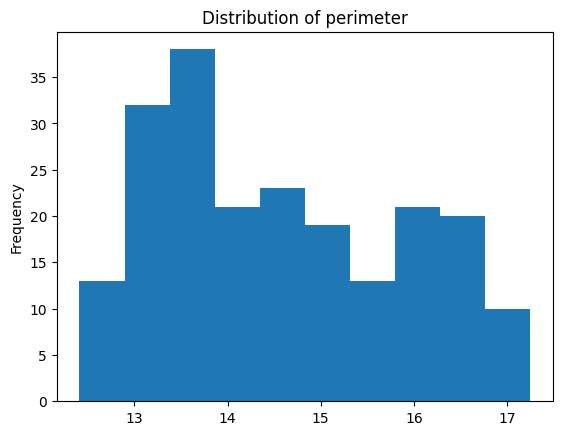

In [247]:
# histogram of 'perimeter'
seed_data["perimeter"].plot.hist(grid=False, bins=10, title="Distribution of perimeter");

***OBSERVATION***<br>
Most of the seeds have a perimeter between 12 - 17 units.

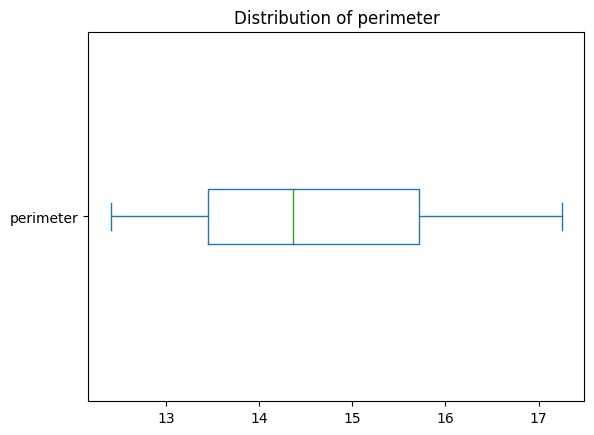

In [248]:
# boxplot of perimeter
seed_data["perimeter"].plot.box(vert = False, title = "Distribution of perimeter");

***OBSERVATION***<br>
There are no outliers as evident from the boxplot above.

**compactness COLUMN**

In [249]:
# summarize compactness column
seed_data["compactness"].describe()

count    210.000000
mean       0.875366
std        0.032931
min        0.808100
25%        0.857600
50%        0.874850
75%        0.889350
max        1.000000
Name: compactness, dtype: float64

***OBSERVATIONS*** <BR>
* The values are clustered around the mean, as evidenced by a relatively low standard deviation.
* 'Compactness' has a relatively tight distribution around its mean, with most values falling within a small range.

In [250]:
# view unique values
seed_data['compactness'].unique()

array([0.871 , 0.8811, 0.905 , 0.8955, 0.9034, 0.8951, 0.8799, 0.8911,
       0.8747, 0.888 , 0.8696, 0.8796, 0.8759, 0.8744, 0.8993, 0.9183,
       0.9058, 0.9153, 1.    , 0.8584, 0.8722, 0.8988, 0.8664, 0.8657,
       0.8849, 0.8641, 0.8564, 0.882 , 0.8604, 0.8662, 0.8724, 0.8529,
       0.8728, 0.9   , 0.8734, 0.9079, 0.8823, 0.8944, 0.8871, 0.8852,
       0.9009, 0.8986, 0.8794, 0.8861, 0.8883, 0.8819, 0.8676, 0.8751,
       0.8923, 0.8538, 0.8831, 0.8557, 0.8658, 0.8818, 0.9006, 0.8857,
       0.8392, 0.8683, 0.884 , 0.868 , 0.8716, 0.8879, 0.8726, 0.8625,
       0.8458, 0.8673, 0.8623, 0.8763, 0.9081, 0.8786, 0.8638, 0.8599,
       0.875 , 0.8892, 0.8977, 0.8894, 0.8779, 0.878 , 0.887 , 0.8969,
       0.859 , 0.8989, 0.9031, 0.8984, 0.8906, 0.9066, 0.8452, 0.8648,
       0.8815, 0.8687, 0.8637, 0.881 , 0.8866, 0.8992, 0.8985, 0.8717,
       0.8829, 0.8917, 0.9056, 0.88  , 0.8752, 0.8865, 0.8921, 0.9035,
       0.8859, 0.8854, 0.9077, 0.889 , 0.9008, 0.8897, 0.8772, 0.8588,
      

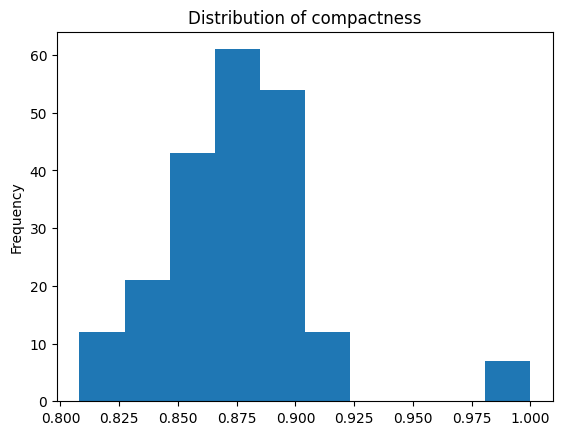

In [251]:
# histogram of 'compactness'
seed_data["compactness"].plot.hist(grid=False, bins=10, title="Distribution of compactness");

***OBSERVATION***<br>
* The compactness values of majority of the seeds lie between 0.86 - 0.90 units.
* A relatively small proportion of data points lie outside the general range.


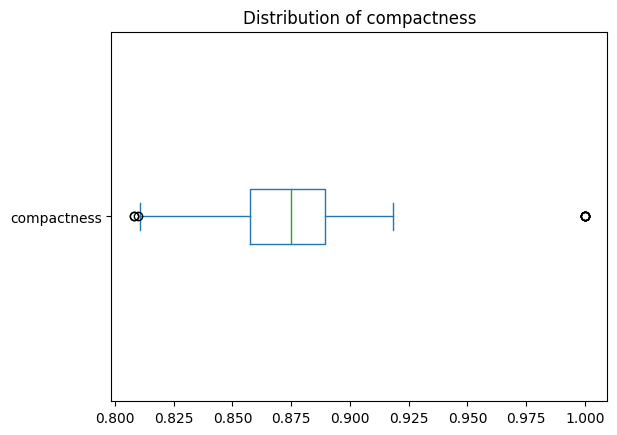

In [252]:
# boxplot of compactness
seed_data["compactness"].plot.box(vert = False, title = "Distribution of compactness");

***OBSERVATION***<br>
There are only few outliers as evident from the above boxplot (this is also shown in the histogram above). We can simply ignore them as they are insignificant in number in comparison to the rest of the data.

**lengthOfKernel COLUMN**

In [253]:
# summarize lengthOfKernel
seed_data["lengthOfKernel"].describe()

count    210.000000
mean       5.633386
std        0.441515
min        4.899000
25%        5.264000
50%        5.534000
75%        5.993500
max        6.675000
Name: lengthOfKernel, dtype: float64

***OBSERVATIONS***<br>
"lengthOfKernel" variable has a distribution that is moderately symmetric and centered around the mean value of approximately 5.6334 units.

In [254]:
# view unique values
seed_data['compactness'].unique()

array([0.871 , 0.8811, 0.905 , 0.8955, 0.9034, 0.8951, 0.8799, 0.8911,
       0.8747, 0.888 , 0.8696, 0.8796, 0.8759, 0.8744, 0.8993, 0.9183,
       0.9058, 0.9153, 1.    , 0.8584, 0.8722, 0.8988, 0.8664, 0.8657,
       0.8849, 0.8641, 0.8564, 0.882 , 0.8604, 0.8662, 0.8724, 0.8529,
       0.8728, 0.9   , 0.8734, 0.9079, 0.8823, 0.8944, 0.8871, 0.8852,
       0.9009, 0.8986, 0.8794, 0.8861, 0.8883, 0.8819, 0.8676, 0.8751,
       0.8923, 0.8538, 0.8831, 0.8557, 0.8658, 0.8818, 0.9006, 0.8857,
       0.8392, 0.8683, 0.884 , 0.868 , 0.8716, 0.8879, 0.8726, 0.8625,
       0.8458, 0.8673, 0.8623, 0.8763, 0.9081, 0.8786, 0.8638, 0.8599,
       0.875 , 0.8892, 0.8977, 0.8894, 0.8779, 0.878 , 0.887 , 0.8969,
       0.859 , 0.8989, 0.9031, 0.8984, 0.8906, 0.9066, 0.8452, 0.8648,
       0.8815, 0.8687, 0.8637, 0.881 , 0.8866, 0.8992, 0.8985, 0.8717,
       0.8829, 0.8917, 0.9056, 0.88  , 0.8752, 0.8865, 0.8921, 0.9035,
       0.8859, 0.8854, 0.9077, 0.889 , 0.9008, 0.8897, 0.8772, 0.8588,
      

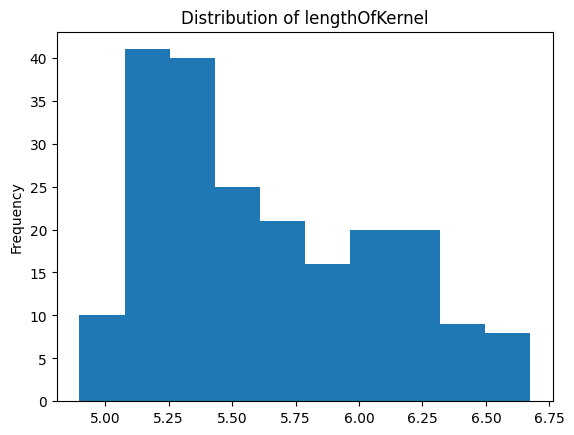

In [255]:
# histogram of 'lengthOfKernel'
seed_data["lengthOfKernel"].plot.hist(grid=False, bins=10, title="Distribution of lengthOfKernel");

***OBSERVATION***<br>
majority of the lenthOfKernel values lie around 5.25 units.

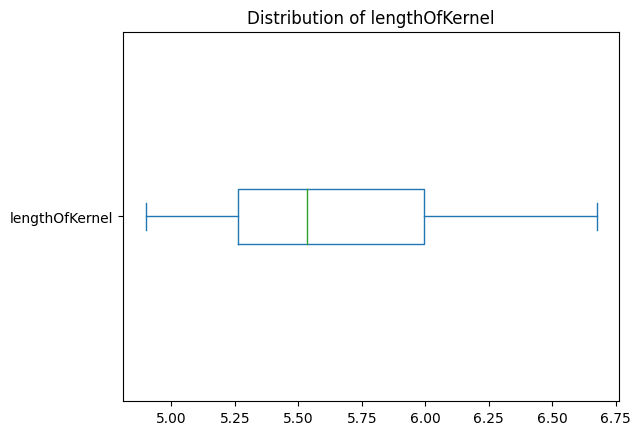

In [256]:
# boxplot of compactness
seed_data["lengthOfKernel"].plot.box(vert = False, title = "Distribution of lengthOfKernel");

***OBSERVATION*** <br>
There is only one outlier as evident from the boxplot above.

**widthOfKernel COLUMN**

In [257]:
# summarize widthOfKernel
seed_data["widthOfKernel"].describe()

count    210.000000
mean       3.259510
std        0.376861
min        2.630000
25%        2.953750
50%        3.237000
75%        3.561750
max        4.033000
Name: widthOfKernel, dtype: float64

***OBSERVATIONS***<BR>
*  The mean and quartile values (Q1 and Q3) suggest that the "widthOfKernel" values are relatively close to each other and are clustered around the mean. <BR>

* The standard deviation indicates a moderate level of variability around the mean. <BR>
    
* Most of the data falls within the range of the minimum and maximum values.

In [258]:
# view unique values
seed_data["widthOfKernel"].unique()

array([3.312, 3.333, 3.337, 3.379, 3.562, 3.259, 3.302, 3.465, 3.505,
       3.242, 3.201, 3.199, 3.156, 3.114, 3.383, 3.514, 3.466, 3.049,
       3.129, 3.168, 3.507, 2.936, 3.245, 3.421, 3.026, 2.956, 3.221,
       3.065, 2.975, 3.371, 3.186, 3.15 , 3.328, 3.485, 3.464, 3.683,
       3.288, 3.298, 3.158, 3.396, 3.462, 3.155, 3.393, 3.377, 3.291,
       3.258, 3.272, 3.434, 3.113, 3.212, 3.412, 3.419, 3.032, 2.85 ,
       2.879, 3.042, 3.07 , 3.119, 3.19 , 3.153, 2.882, 3.561, 3.484,
       3.594, 3.93 , 3.486, 3.438, 3.403, 3.814, 3.639, 3.566, 3.467,
       3.857, 3.864, 3.772, 3.801, 3.651, 3.764, 3.67 , 4.033, 4.032,
       3.785, 3.796, 3.693, 3.86 , 3.463, 3.81 , 3.552, 3.512, 3.684,
       3.525, 3.694, 3.892, 3.681, 3.755, 3.786, 3.806, 3.573, 3.763,
       3.674, 3.769, 3.791, 3.902, 3.737, 3.991, 3.719, 3.897, 3.815,
       3.962, 3.563, 3.387, 3.771, 3.582, 3.869, 3.687, 3.773, 3.69 ,
       3.825, 3.268, 3.395, 3.408, 3.574, 3.231, 3.286, 3.472, 2.994,
       3.073, 3.074,

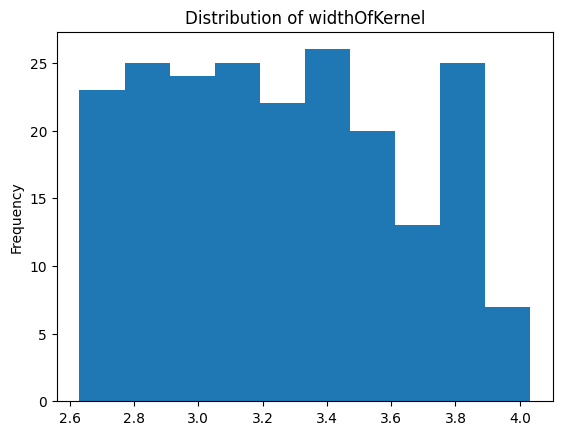

In [259]:
# histogram of 'lengthOfKernel'
seed_data["widthOfKernel"].plot.hist(grid=False, bins=10, title="Distribution of widthOfKernel");

***OBSERVATION***<br>
For majority number of the seeds, widthofKernel values lie between 2.62 - 3.8 units.

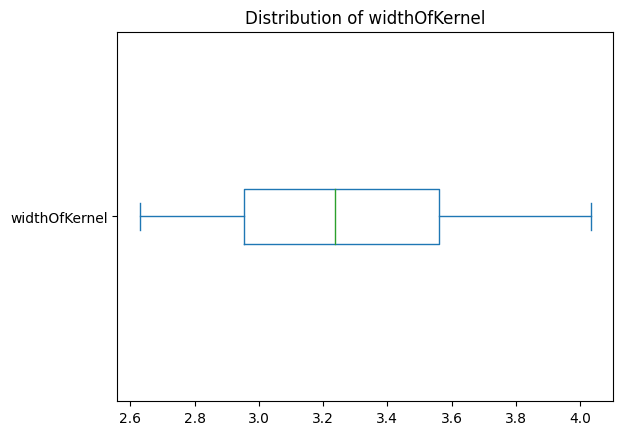

In [260]:
# boxplot of widthOfKernel
seed_data["widthOfKernel"].plot.box(vert = False, title = "Distribution of widthOfKernel");

***OBSERVATION***<br>
There are no outliers as evident from the boxplot.

**asymmetryCoefficient COLUMN**

In [261]:
# summarize asymmetryCoefficient 
seed_data["asymmetryCoefficient"].describe()

count    210.000000
mean       3.696277
std        1.501810
min        0.765100
25%        2.561500
50%        3.599000
75%        4.744750
max        8.456000
Name: asymmetryCoefficient, dtype: float64

***OBSERVATIONS*** <BR>
* The mean and quartile values (Q1 and Q3) suggest that the "asymmetryCoefficient" values are clustered around the mean, although the distribution appears to have a noticeable positive skewness due to the relatively large standard deviation and the presence of outliers on the upper end (as indicated by the maximum value).
    


In [262]:
# view unique values
seed_data['asymmetryCoefficient'].unique()

array([2.221 , 1.018 , 2.699 , 2.259 , 1.355 , 2.462 , 3.586 , 2.7   ,
       2.04  , 1.969 , 4.543 , 1.717 , 3.986 , 3.136 , 2.932 , 4.185 ,
       5.234 , 1.599 , 1.767 , 4.102 , 3.072 , 2.688 , 0.7651, 1.415 ,
       1.791 , 0.903 , 3.373 , 2.504 , 2.754 , 3.531 , 0.8551, 3.412 ,
       3.92  , 2.124 , 2.129 , 2.27  , 2.823 , 2.956 , 3.112 , 6.685 ,
       2.587 , 2.249 , 2.461 , 4.711 , 3.128 , 1.56  , 1.367 , 2.958 ,
       2.704 , 3.975 , 5.593 , 4.116 , 3.328 , 1.481 , 1.933 , 2.802 ,
       1.142 , 1.999 , 1.502 , 2.269 , 3.22  , 4.157 , 1.176 , 2.352 ,
       1.313 , 2.217 , 1.464 , 3.533 , 4.076 , 4.675 , 4.539 , 2.936 ,
       4.004 , 4.92  , 3.824 , 4.451 , 5.064 , 2.858 , 5.532 , 5.324 ,
       5.173 , 1.472 , 2.962 , 2.443 , 1.649 , 3.691 , 5.78  , 5.016 ,
       1.955 , 3.12  , 3.237 , 6.001 , 4.933 , 3.696 , 3.477 , 2.144 ,
       2.853 , 2.188 , 4.217 , 2.068 , 4.308 , 3.357 , 3.368 , 2.553 ,
       2.843 , 3.747 , 3.252 , 1.738 , 2.235 , 3.678 , 2.109 , 6.682 ,
      

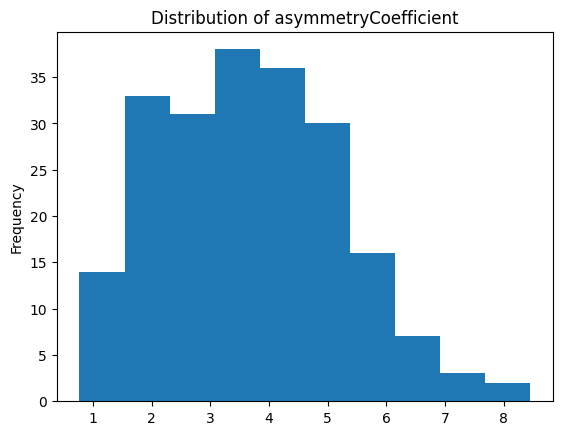

In [263]:
# histogram of 'asymmetryCoefficient'
seed_data["asymmetryCoefficient"].plot.hist(grid=False, bins=10, title="Distribution of asymmetryCoefficient");

***OBSERVATION***<br>
* Most of the asymmetryCoefficient values lie between 2- 5.
* 'asymmetryCoefficient' variable has a distribution with some variability around the mean but with a right-skewed tail toward higher values.

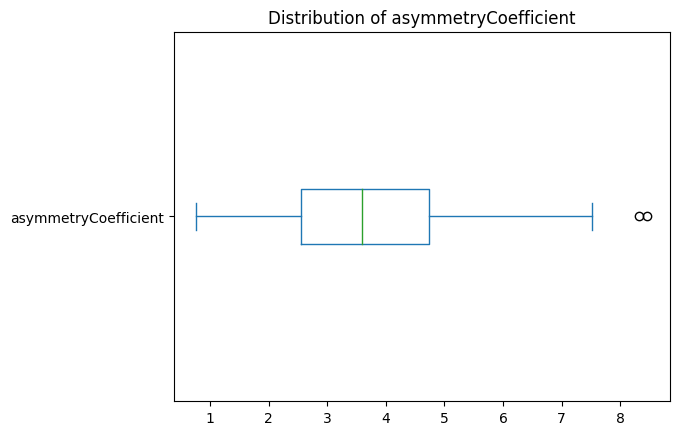

In [264]:
# boxplot of asymmetryCoefficient
seed_data["asymmetryCoefficient"].plot.box(vert = False, title = "Distribution of asymmetryCoefficient");

***OBSERVATION***<br>
There are only few outliers as evident from the above boxplot. We can simply ignore them as they are very less in number and would  not affect the rest of the data.

**lengthOfKernelGroove COLUMN**

In [265]:
# summarize lengthOfKernelGroove
seed_data["lengthOfKernelGroove"].describe()

count    210.000000
mean       5.393624
std        0.492931
min        4.519000
25%        5.003000
50%        5.219000
75%        5.877000
max        6.550000
Name: lengthOfKernelGroove, dtype: float64

In [266]:
# view unique values
seed_data["lengthOfKernelGroove"].unique()

array([5.22 , 4.956, 4.825, 4.805, 5.175, 5.219, 5.   , 5.877, 5.533,
       5.314, 5.001, 4.738, 4.872, 4.781, 5.046, 4.649, 4.914, 5.176,
       5.091, 4.961, 5.307, 4.869, 5.038, 5.097, 5.056, 5.228, 5.012,
       5.36 , 5.484, 5.309, 5.178, 4.783, 5.528, 5.18 , 5.132, 5.111,
       5.351, 5.144, 5.136, 5.396, 5.224, 5.487, 5.439, 5.044, 5.088,
       5.222, 4.519, 4.607, 4.703, 4.605, 4.782, 5.15 , 5.3  , 5.067,
       6.06 , 5.791, 6.079, 5.841, 5.795, 5.922, 6.451, 6.362, 5.746,
       5.88 , 5.879, 6.187, 6.273, 6.185, 6.197, 6.109, 6.498, 6.231,
       6.321, 6.449, 6.053, 6.448, 5.967, 6.238, 6.453, 6.097, 5.618,
       6.009, 6.229, 6.148, 6.2  , 5.929, 6.55 , 5.894, 5.794, 5.965,
       5.924, 6.316, 6.163, 5.75 , 5.966, 6.32 , 6.188, 6.011, 5.703,
       5.992, 6.102, 5.919, 5.661, 5.962, 5.949, 5.847, 5.971, 5.752,
       5.395, 5.44 , 5.221, 5.275, 5.002, 5.316, 5.194, 5.27 , 5.263,
       5.003, 5.31 , 5.491, 5.308, 5.049, 5.338, 5.163, 5.089, 5.185,
       5.092, 4.963,

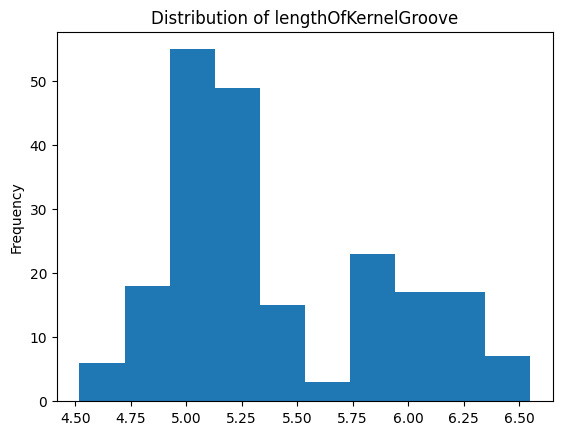

In [267]:
# histogram of lengthOfKernelGroove
seed_data["lengthOfKernelGroove"].plot.hist(grid=False, bins=10, title="Distribution of lengthOfKernelGroove");

***OBSERVATION***<br>
lengthOfKernelGroove values for majority of the seeds is between 48-50 units.

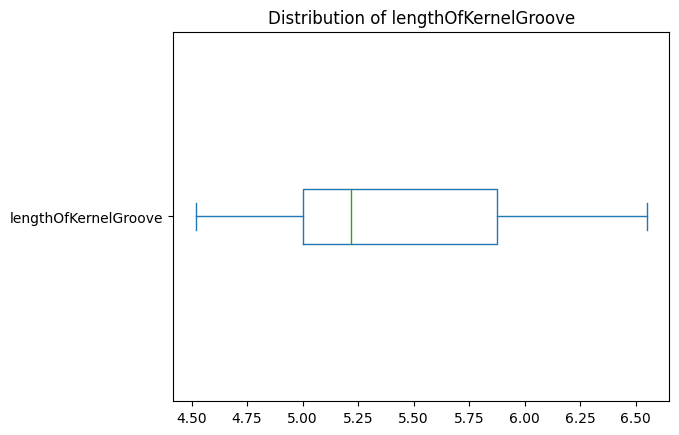

In [268]:
# boxplot of lengthOfKernelGroove
seed_data["lengthOfKernelGroove"].plot.box(vert = False, title = "Distribution of lengthOfKernelGroove");

***OBSERVATION*** <BR>
There are no outliers as evident from the boxplot above.

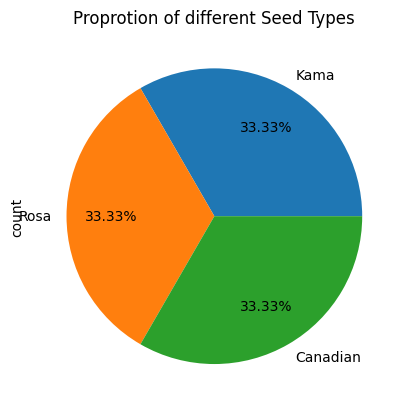

In [269]:
# distribution of the 'seedType' column values
seedType_distribution = seed_data["seedType"].value_counts()
seedType_distribution

# make a pie chart
seedType_distribution.plot.pie(autopct='%1.2f%%', pctdistance=0.7, radius=1, title="Proprotion of different Seed Types");


***OBSERVATION***  <BR>
There 3 different types of seeds (Kama, Rosa, Canadian) are in equal proportions (33% each).

## BIVARIATE EDA

### A) Correlation among numeric data

In [270]:
seed_data.columns

Index(['area', 'perimeter', 'compactness', 'lengthOfKernel', 'widthOfKernel',
       'asymmetryCoefficient', 'lengthOfKernelGroove', 'seedType'],
      dtype='object')

In [271]:
# !pip install seaborn
import seaborn as sns

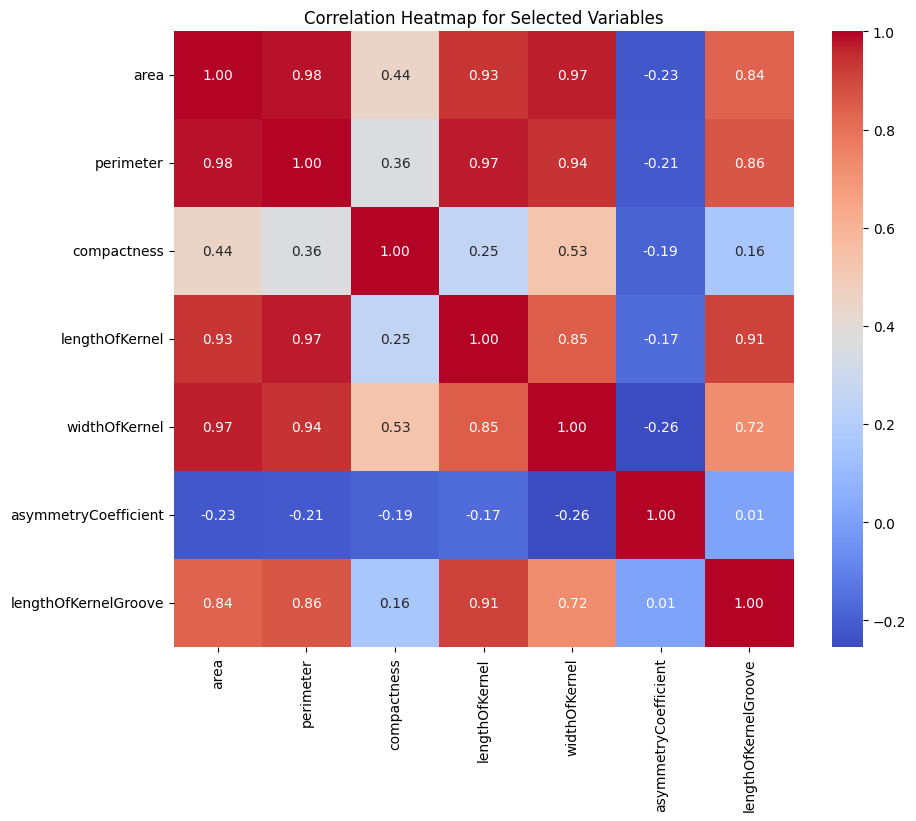

In [272]:
# Select the columns of interest
selected_columns = ['area', 'perimeter', 'compactness', 'lengthOfKernel', 'widthOfKernel', 'asymmetryCoefficient', 'lengthOfKernelGroove']
selected_data = seed_data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Selected Variables")
plt.show()

***OBSERVATIONS from the correlation heatmap***<br>

1. ***Positive Correlations*** (shown  by darker shades of red): <br>
'area' and 'perimeter' have a positive (meaning strong) correlation. Hence, as expected, larger areas generally lead to larger perimeters. <br>
'lengthOfKernel' and 'widthOfKernel' have a positive correlation, indicating that longer kernels tend to be wider as well. <br> <br>

2. ***Negative Correlations:*** <br>
There are no strong negative (indicated by -1) correlations among the selected variables. <br> <br>

3. ***Weak Correlations*** (shown by shades of blue): <br> 
'compactness' has weak correlations with most other variables, indicating that it might not have a strong linear relationship with the other attributes. <br>
'asymmetryCoefficient' and 'lengthOfKernelGroove' show weak correlations with other variables.



/home/s4670192/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


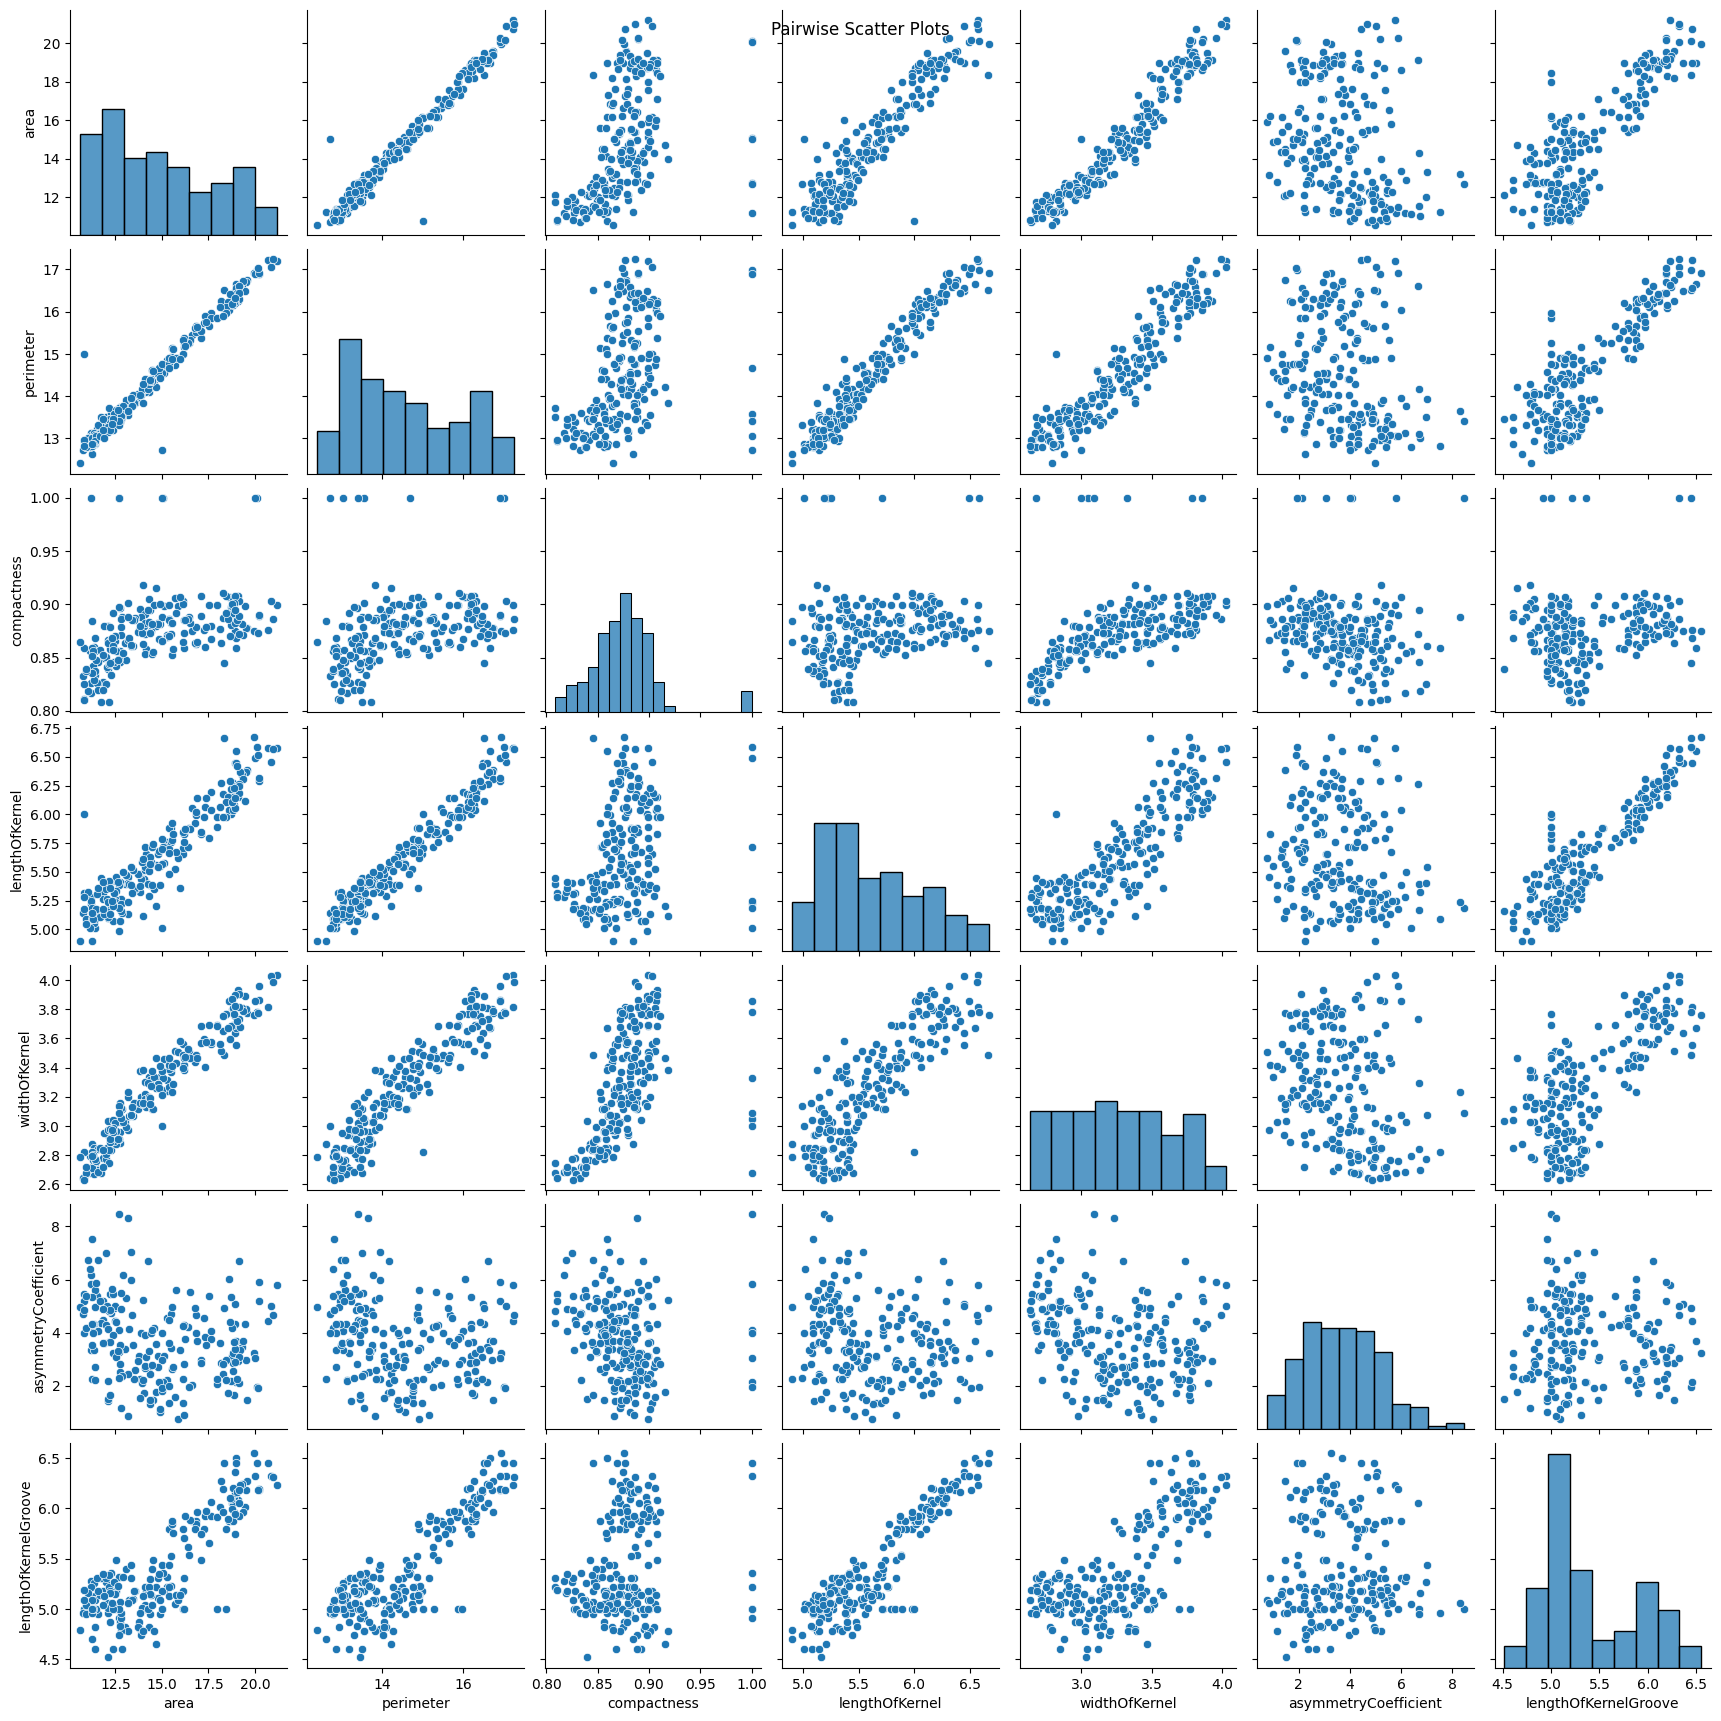

In [273]:
# Plot scatter plots for various pairs of variables
sns.pairplot(seed_data)
plt.suptitle("Pairwise Scatter Plots")
plt.show()


***OBSERVATION***<br>
The above pairwise scatterplot confirms the observations from the correlation heatmap given before:

* ***Positive Correlation - scatterplot are arranged in upward-sloping pattern:*** <br>
'area' has a strong correlation with 'perimeter', 'lengthOfKernel' and 'widthOfKernel'. This indicates, if one variable increases, the other tends to increase as well. <br> <br>

* ***Negative Correlation - scatterplot arranged in downward sloping pattern:***<br>
There are no strong negative correlations amoung the given variables. <br><br>

* ***Weak Correlation - scatterplots are spread out without a clear trend:***<br>
'assymetryCoefficient' and 'lengthOfKernelGroove' show weak correlation with other variables.

### B) **CATEGORICAL VARIABLE ANALYSIS** - CORRELATION AMOUNG NUMERIC AND CATEGORICAL DATA

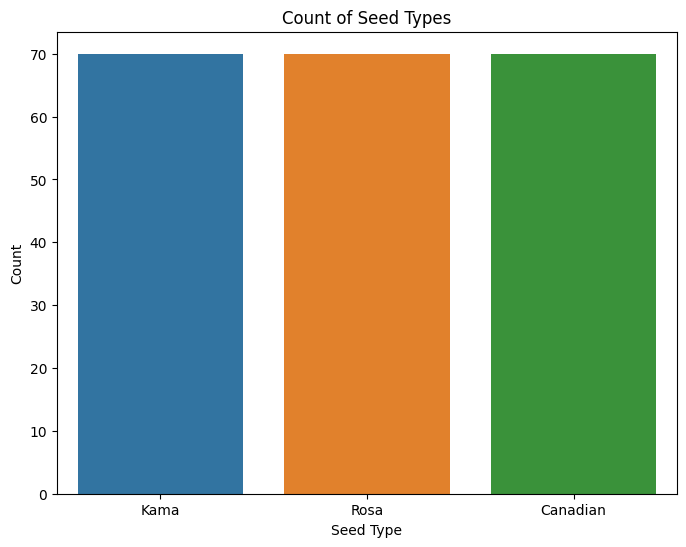

In [274]:
# Count plot for 'seedType'
plt.figure(figsize=(8, 6))
sns.countplot(data=seed_data, x='seedType')
plt.title("Count of Seed Types")
plt.xlabel("Seed Type")
plt.ylabel("Count")
plt.show()

 ***OBSERVATION** <BR>
All the 3 seed types have an equal count of 70.


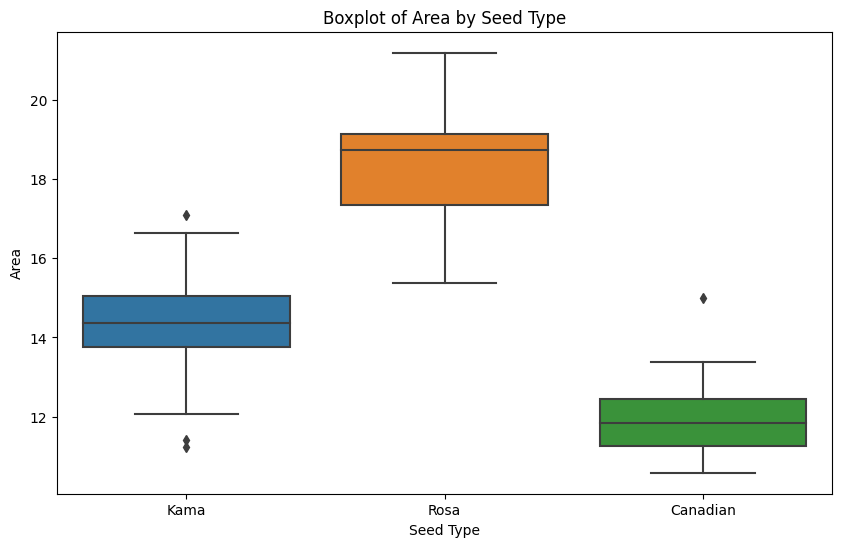

In [275]:
# Box plot of 'area' by 'seedType'
plt.figure(figsize=(10, 6))
sns.boxplot(data=seed_data, x='seedType', y='area')
plt.title("Boxplot of Area by Seed Type")
plt.xlabel("Seed Type")
plt.ylabel("Area")
plt.show()

***OBSERVATION*** <br>
Rosa seed types have the largest areas while Canadian ones have the least.
Likewise, Rosa seed types have the greatest perimeter along with the largest length and width kernels in comparison to the others.
(Because 'area' has a strong correlation with perimeter, length and width of kernels, as observed from previous observations).


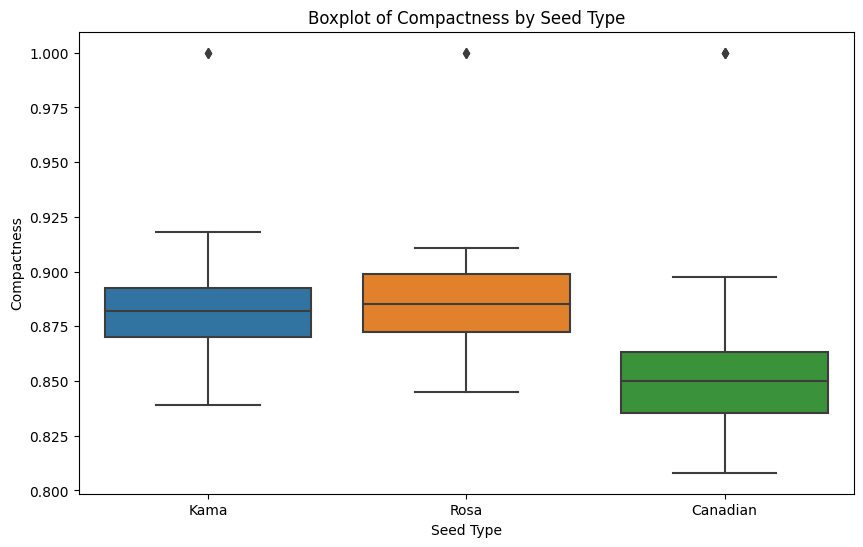

In [276]:
# Box plot of 'compactness' by 'seedType'
plt.figure(figsize=(10, 6))
sns.boxplot(data=seed_data, x='seedType', y='compactness')
plt.title("Boxplot of Compactness by Seed Type")
plt.xlabel("Seed Type")
plt.ylabel("Compactness")
plt.show()

***OBSERVATION*** <br>
Kama and Rosa seeds have almost the same level of compactness. As evident from the boxplots above, there is a very insignificant number of outliers for each seed type and . We can safely ignore these outliers as there are not many of them. Also, all of them are almost of the same value which seems unusual.

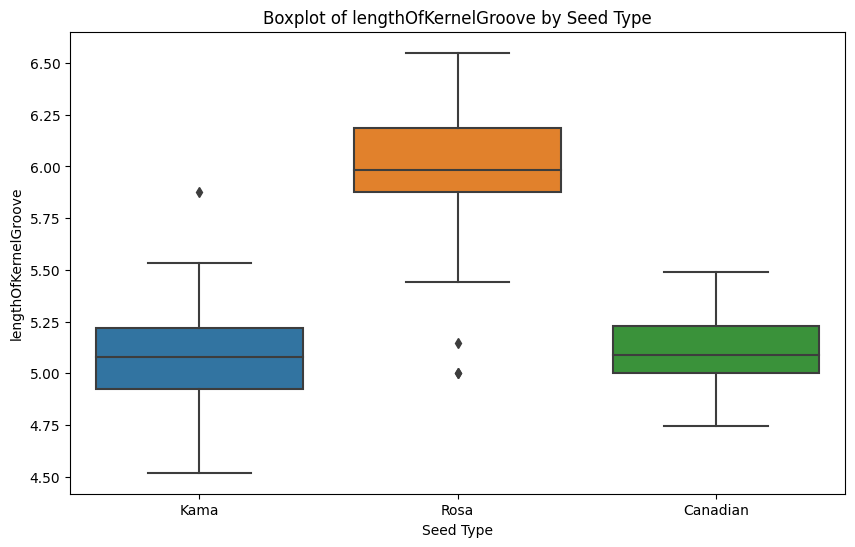

In [277]:
# Box plot of 'lenthOfKernelGroove' by 'seedType'
plt.figure(figsize=(10, 6))
sns.boxplot(data=seed_data, x='seedType', y='lengthOfKernelGroove')
plt.title("Boxplot of lengthOfKernelGroove by Seed Type")
plt.xlabel("Seed Type")
plt.ylabel("lengthOfKernelGroove")
plt.show()

***OBSERVATION*** <br>
Rosa has the longest kernel grooves while Canadian and Kama have almost similar range of values.
We can again ignore the outliers here as they are very few in number and won't have a significant effect on our data.

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**



# Ques3.
**Find the mean and standard deviation of each type of measurement for each wheat variety and report your findings in a table. Comment on apparent differences between the wheat variety.**

In [278]:
# Define the columns for which you want to calculate mean and standard deviation
columns_to_agg = ['area', 'perimeter', 'compactness', 'lengthOfKernel', 'widthOfKernel', 'asymmetryCoefficient', 'lengthOfKernelGroove']

# Group the data by 'seedType' and calculate mean and standard deviation for the specified columns
result = seed_data.groupby('seedType')[columns_to_agg].agg(['mean', 'std'])

# Reset the index to have 'seedType' as a regular column
result = result.reset_index()

# Rename the columns to include the statistics (mean and std)
result.columns = [f'{col}_{stat}' if col != 'seedType' else col for col, stat in result.columns]

# Display the result
print(result)


   seedType  area_mean  area_std  perimeter_mean  perimeter_std  \
0  Canadian  11.928429  0.808931       13.282571       0.390313   
1      Kama  14.334429  1.215704       14.294286       0.576583   
2      Rosa  18.334286  1.439496       16.135714       0.616995   

   compactness_mean  compactness_std  lengthOfKernel_mean  lengthOfKernel_std  \
0          0.855399         0.037266             5.244071            0.162916   
1          0.883691         0.025764             5.508057            0.231508   
2          0.887007         0.024899             6.148029            0.268191   

   widthOfKernel_mean  widthOfKernel_std  asymmetryCoefficient_mean  \
0            2.856486           0.148444                   4.776629   
1            3.244629           0.177616                   2.667403   
2            3.677414           0.185539                   3.644800   

   asymmetryCoefficient_std  lengthOfKernelGroove_mean  \
0                  1.340198                   5.116071   
1    


#### Before analysing the table above, it is important to clear out the general definitions in context to the data to understand the results better:
**Mean**:  mean values indicate the typical or average values of these parameters within each wheat variety, giving us insight into how each variety differs in terms of these measurements.
It is a measure of central tendency that provides an idea of the typical or average value within a dataset. <br> <br>

**Standard deviation**:  standard deviations indicate how much the values for these parameters vary within each wheat variety. A higher standard deviation suggests greater variability, while a lower standard deviation indicates that the values are closer to the mean, and there is less variability.<br> <br>

***OBSERVATIONS*** <br> 
Based on the provided results, we can make the following observations regarding the apparent differences between the wheat varieties (Canadian, Kama, and Rosa) in terms of their geometric parameters:

* **Area Mean and Standard Deviation:** <br>
Rosa has the highest mean area (18.33), indicating larger kernels on average, while Canadian has the smallest (11.88). <br>
Rosa also exhibits the highest standard deviation in area (1.44), suggesting greater variability in kernel size within the Rosa variety. <br> <br>


* **Perimeter Mean and Standard Deviation:** <br>
Similar to the area, Rosa has the highest mean perimeter (16.14), while Canadian has the smallest (13.26).<br> 
Rosa again shows the highest standard deviation in perimeter (0.62), indicating variability in kernel shape within Rosa.<br> <br>


* **Compactness Mean and Standard Deviation:** <br> 
The compactness mean is relatively similar across all varieties.
The standard deviations for compactness are quite low for all varieties, suggesting that this feature is relatively consistent within each variety.<br> <br>


* **Length of Kernel Mean and Standard Deviation:** <br>
Rosa has the longest kernels on average (6.15), followed by Kama (5.51) and Canadian (5.23).
Rosa also has the highest standard deviation in length (0.27), indicating variability in kernel length within Rosa.<br> <br>


* **Width of Kernel Mean and Standard Deviation:**<br> 
Similar to the length, Rosa has the widest kernels on average (3.68), followed by Kama (3.24) and Canadian (2.85).<br> 
Rosa shows a higher standard deviation in width (0.19) compared to Kama (0.18) and Canadian (0.15).<br> <br>


* **Asymmetry Coefficient Mean and Standard Deviation:**<br> 
Rosa has a relatively higher mean asymmetry coefficient (3.64) compared to Canadian (4.80) and Kama (2.67).<br> 
The standard deviations are moderate, suggesting some variability in asymmetry within each variety.<br> <br>


* **Length of Kernel Groove Mean and Standard Deviation:** <br> 
Rosa has the longest kernel grooves on average (6.03), followed by Kama (5.07) and Canadian (5.12).
The standard deviations for this feature are relatively low across all varieties.<br> <br>

Overall, Rosa appears to have larger and more variable kernels compared to Canadian and Kama. Canadian generally has smaller and less variable kernels. Kama falls in between these two varieties for most features. These differences in geometric parameters can provide insights into the distinct characteristics of each wheat variety, which may have implications for agricultural or research purposes.

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**



# Ques4. 
**Find correlations among the numerical columns for each wheat variety. Produce
visualisations for the correlations and explain the observed results.**

In [279]:
seed_data.groupby('seedType').cov()

area  perimeter  compactness  \
seedType                                                          
Canadian area                  0.654370   0.154272     0.014897   
         perimeter             0.154272   0.152344    -0.000043   
         compactness           0.014897  -0.000043     0.001389   
         lengthOfKernel        0.022676   0.053880    -0.001504   
         widthOfKernel         0.098166   0.026778     0.003014   
         asymmetryCoefficient  0.007823   0.006589     0.005947   
         lengthOfKernelGroove  0.024103   0.025521    -0.001771   
Kama     area                  1.477935   0.684437     0.005495   
         perimeter             0.684437   0.332448     0.000843   
         compactness           0.005495   0.000843     0.000664   
         lengthOfKernel        0.234944   0.122965    -0.000725   
         widthOfKernel         0.194349   0.082170     0.001692   
         asymmetryCoefficient -0.072044  -0.036510     0.002482   
         lengthOfKernelGroove  0.206469   0.108190    -0.000299   
Rosa     area                  2.072149   0.866674     0.012214   
         perimeter             0.866674   0.380683     0.003417   
         compactness           0.012214   0.003417     0.000620   
         lengthOfKernel        0.319051   0.149998     0.000479   
         widthOfKernel         0.235165   0.087899     0.002356   
         asymmetryCoefficient -0.067207  -0.023392    -0.005330   
         lengthOfKernelGroove  0.269108   0.132702    -0.000104   

                               lengthOfKernel  widthOfKernel  \
seedType                                                       
Canadian area                        0.022676       0.098166   
         perimeter                   0.053880       0.026778   
         compactness                -0.001504       0.003014   
         lengthOfKernel              0.026542       0.000539   
         widthOfKernel               0.000539       0.022036   
         asymmetryCoefficient        0.015402       0.012892   
         lengthOfKernelGroove        0.016599      -0.003262   
Kama     area                        0.234944       0.194349   
         perimeter                   0.122965       0.082170   
         compactness                -0.000725       0.001692   
         lengthOfKernel              0.053596       0.022639   
         widthOfKernel               0.022639       0.031547   
         asymmetryCoefficient       -0.009971      -0.005561   
         lengthOfKernelGroove        0.048254       0.017977   
Rosa     area                        0.319051       0.235165   
         perimeter                   0.149998       0.087899   
         compactness                 0.000479       0.002356   
         lengthOfKernel              0.071926       0.025531   
         widthOfKernel               0.025531       0.034425   
         asymmetryCoefficient       -0.016664       0.002872   
         lengthOfKernelGroove        0.069084       0.017494   

                               asymmetryCoefficient  lengthOfKernelGroove  
seedType                                                                   
Canadian area                              0.007823              0.024103  
         perimeter                         0.006589              0.025521  
         compactness                       0.005947             -0.001771  
         lengthOfKernel                    0.015402              0.016599  
         widthOfKernel                     0.012892             -0.003262  
         asymmetryCoefficient              1.796131              0.023760  
         lengthOfKernelGroove              0.023760              0.025605  
Kama     area                             -0.072044              0.206469  
         perimeter                        -0.036510              0.108190  
         compactness                       0.002482             -0.000299  
         lengthOfKernel                   -0.009971              0.048254  
         widthOfKernel          

# Pearson Correlation Coefficient

In [280]:
seed_data.groupby('seedType').corr().style.background_gradient(cmap = 'Greens')

# Spearman Correlation Coefficent (spearman rho)

In [281]:
seed_data.groupby('seedType').corr(method = 'spearman').style.background_gradient(cmap = 'Purples')

# Kendall Correlation Coefficient

In [282]:
seed_data.groupby('seedType').corr(method = 'kendall').style.background_gradient(cmap = 'Reds')

***OBSERVATIONS*** - Comparing Pearson, Spearman and Kendall Correlation Coefficient <br>

* **Stronger Correlations** (values approximately between 0.4 - 0.9):<br>
All 3 correlation coeffcients show a strong correlation berween area, perimeter, lengthOfKernal and widthOfKernel values for the 3 types of seeds (this is indicated with the darker shades of the respective colours). <br> <br>

* **Weaker Correlations** (values < 0.4):<BR>
compactness, asymmetryCoefficient, lengthOfKernelGroove are mostly weakly related to other variables for all the 3 types of seeds. (this is indicated with the lighter shades of the respective colours). <br>


**Xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**



# Ques 5.
**Perform k-means clustering on the data. Comment on the number of clusters chosen, on
possible limitations, and on any form of uncertainty about the results. Are the results in
agreement with what you observed in the EDA?**


#### METHOD 1- PERFORM K MEANS ON PAIRS WITH MEANINGFUL CORRELATIONS

Based on the correlations among columns discussed under bivariate EDA, we are selecting pairs of columns that have meaningful relationships.

***Strong Positive Correlations:*** <br> 

1. 'area' and 'perimeter':<br> 
These two variables have a strong positive correlation. Consider performing K-means clustering on this pair to explore how the combined information of area and perimeter impacts cluster formation.<br> <br>

2. 'lengthOfKernel' and 'widthOfKernel': <br>
These variables also have a positive correlation. Clustering based on these two attributes can provide insights into how the length and width of the kernels relate to each other in forming clusters.<br> <br>

***Weak Correlations:***<br> 

1. 'compactness' 'asymmetryCoefficient' and 'lengthOfKernelGroove' with other variables:<br> 
Similar to 'compactness,' 'asymmetryCoefficient' and 'lengthOfKernelGroove' show weak correlations with other variables. Consider exploring K-means clustering using these attributes individually to understand their impact on cluster patterns.<br> <br>

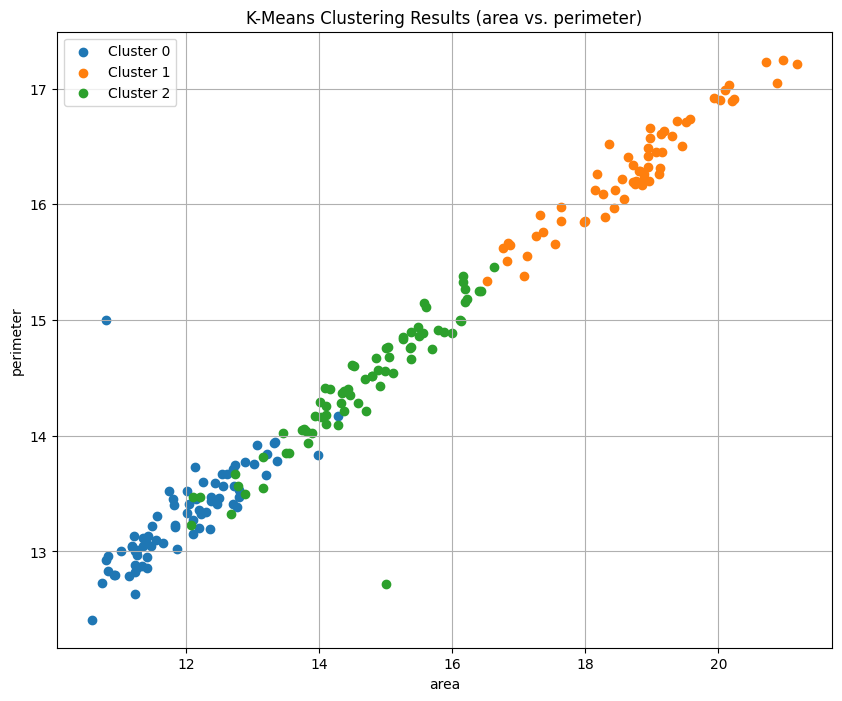

In [283]:
import matplotlib.pyplot as plt

# Choose two features for visualization (e.g., 'area' and 'perimeter')
feature1 = 'area'
feature2 = 'perimeter'

# Create a scatter plot of the chosen features colored by cluster
plt.figure(figsize=(10, 8))
for cluster in range(3):
    cluster_data = result_df[result_df['Cluster'] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster}')
    
plt.title(f'K-Means Clustering Results ({feature1} vs. {feature2})')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.grid(True)
plt.show()


***OBSERVATIONS*** <br>
(assuming the measurements are in mm) <br>
* There are 3 distinct clusters - Cluster 0, Cluster 1 and Cluster 2. <br>
* Cluster 0: Consists of seeds with relatively small area and perimeter (around 10 mm - 14 mm). <br>
* Cluster 1: Consists of seeds with medium sized area and perimeter (around 13 mm - 16 mm). <br>
* Cluster 2: Consists of seeds with larger area and perimeter (around 16 - 22 mm)<br>
* The positive slope suggests positive correlation between area and perimeter (as discussed in previous sections as well).
* There are very few outliers.

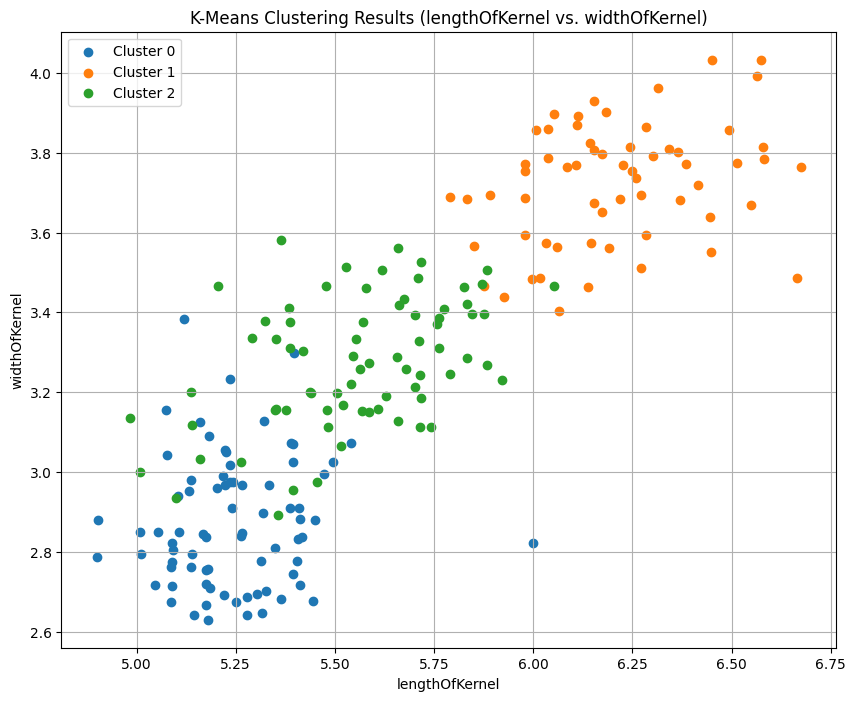

In [284]:
import matplotlib.pyplot as plt

# Choose two features for visualization (e.g., 'area' and 'perimeter')
feature1 = 'lengthOfKernel'
feature2 = 'widthOfKernel'

# Create a scatter plot of the chosen features colored by cluster
plt.figure(figsize=(10, 8))
for cluster in range(3):
    cluster_data = result_df[result_df['Cluster'] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster}')
    
plt.title(f'K-Means Clustering Results ({feature1} vs. {feature2})')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.grid(True)
plt.show()


***OBSERVATIONS*** <BR>
* There are 3 clusters - Cluster 0, Cluster 1 and Cluster 2. <BR>
* Cluster 0: Values approximately range from 2.7 - 5.50 units. <BR>
* Cluster 1: Values approximately range from 5.25 - 6.00 units. <BR>
* Cluster 2: Values approximately ranger from 6.00 - 6.73 units. <BR>
* The slope is positive but the points are more scattered in comparison to the 'area v/s perimeter' plot. This shows that lengthofKernel and widthOfKernel values are positively correlated ( as discussed in previous sections of EDA) but not as strongly as area and perimeter.


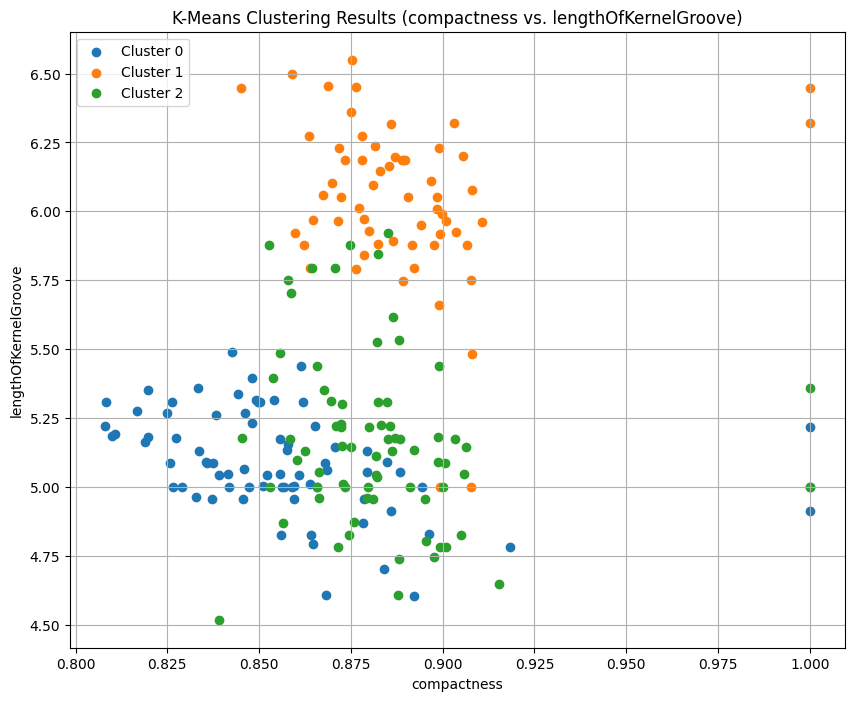

In [285]:
import matplotlib.pyplot as plt

# Choose two features for visualization (e.g., 'area' and 'perimeter')
feature1 = 'compactness'
feature2 = 'lengthOfKernelGroove'

# Create a scatter plot of the chosen features colored by cluster
plt.figure(figsize=(10, 8))
for cluster in range(3):
    cluster_data = result_df[result_df['Cluster'] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster}')
    
plt.title(f'K-Means Clustering Results ({feature1} vs. {feature2})')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.grid(True)
plt.show()


***OBSERVATIONS***<BR>
* There are 3 clusters, but they are not clearly distinct.
* The points are scattered without following any general trend, hence this shows that compactness and lengthOfKernelGroove have a weak correlation (as discussed previously in EDA).
* There are few outliers that deviate significantly from the typical characteristics of the clusters.

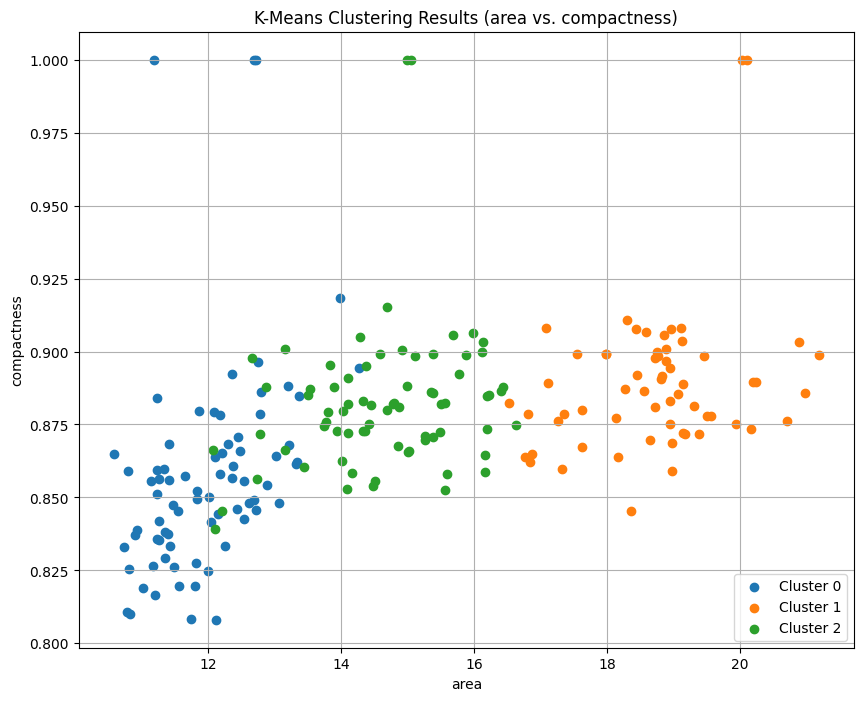

In [286]:
import matplotlib.pyplot as plt

# Choose two features for visualization (e.g., 'area' and 'perimeter')
feature1 = 'area'
feature2 = 'compactness'

# Create a scatter plot of the chosen features colored by cluster
plt.figure(figsize=(10, 8))
for cluster in range(3):
    cluster_data = result_df[result_df['Cluster'] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster}')
    
plt.title(f'K-Means Clustering Results ({feature1} vs. {feature2})')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.grid(True)
plt.show()


***OBSERVATIONS***
* There are 3 clusters, somewhat distinct and very scattered.
* As area increases, compactness of the seeds tends to remain in the same range (roughly between 0.85  - 0.90). 
This shows that area has no impact on compactness of the seeds. <BR>
* There are few outliers that deviate significantly from the typical characteristics of the clusters.

#### METHOD 2- PERFORM K MEANS ON all columns at once

In [287]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Select the numerical columns from seed_data (excluding 'seedType')
numerical_columns = seed_data.drop('seedType', axis=1)

# Apply k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(numerical_columns)

# Create a new DataFrame to store the results
result_df = pd.DataFrame(numerical_columns, columns=numerical_columns.columns)
result_df['Cluster'] = cluster_labels

# Display the result DataFrame with cluster assignments
print(result_df.head())



    area  perimeter  compactness  lengthOfKernel  widthOfKernel  \
0  15.26      14.84       0.8710           5.763          3.312   
1  14.88      14.57       0.8811           5.554          3.333   
2  14.29      14.09       0.9050           5.291          3.337   
3  13.84      13.94       0.8955           5.324          3.379   
4  16.14      14.99       0.9034           5.658          3.562   

   asymmetryCoefficient  lengthOfKernelGroove  Cluster  
0                 2.221                 5.220        2  
1                 1.018                 4.956        2  
2                 2.699                 4.825        2  
3                 2.259                 4.805        2  
4                 1.355                 5.175        2  


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


* **Choosing the Number of Clusters (k):** <br> 
Since we have three different varieties of wheat (Kama, Rosa, and Canadian), we take with k=3, as we expect there to be three natural clusters. <br> <br>

* **Limitations:**<br> 
K-means assumes that clusters are spherical, equally sized, and have similar densities. It may not work well if these assumptions do not hold in our data.
The results can be sensitive to the initial placement of cluster centroids. Running the algorithm multiple times with different initializations can mitigate this issue. <br> 
Outliers can significantly affect the results, so it's essential to handle outliers appropriately, perhaps by removing them or using a different clustering algorithm that is less sensitive to outliers.
As observed before, we chose to ignore the outliers as they are very few of them and hence won't have a major impact on the rest of the data.<br> <br>

* **Uncertainty:**<br> 
K-means provides a hard assignment of data points to clusters, which means that each data point belongs to only one cluster. <br> <br>

How we can visualize the clustering now? Well, we cannot do it directly if we have more than 3 columns. However, we can apply a Principal Component Analysis to reduce the space in 2 columns and visualize this instead. This is performed below:

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


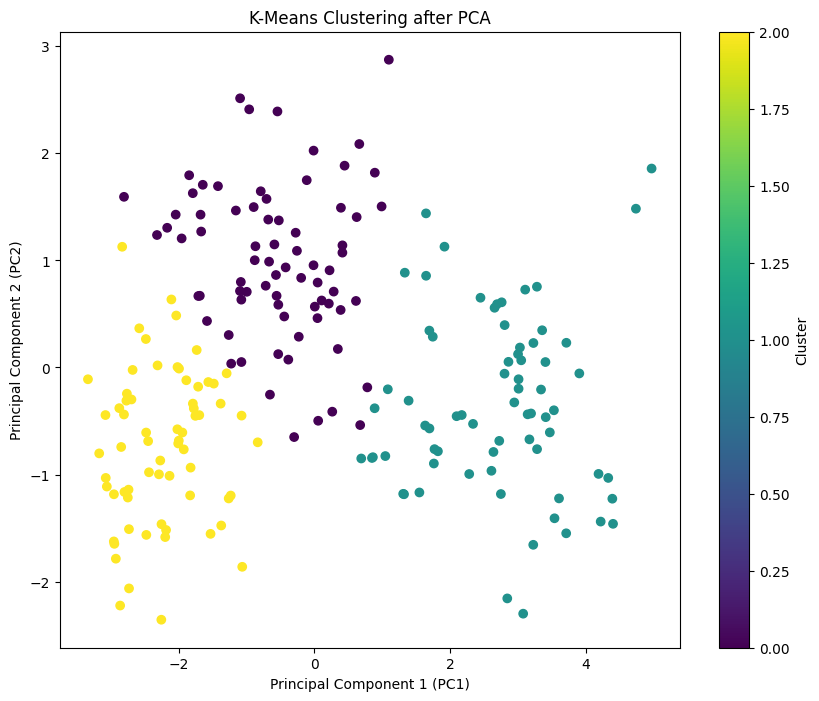

In [288]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the numerical columns from seed_data (excluding 'seedType')
numerical_columns = seed_data.drop('seedType', axis=1)

# Standardize the features (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_columns)

# Define the number of components you want after PCA
pca_num_components = 2

# Create a PCA instance with the desired number of components
pca = PCA(n_components=pca_num_components)

# Fit and transform the data using PCA
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_num_components)])

# Apply K-means clustering to the PCA components
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(pca_result)

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = cluster_labels

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering after PCA')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.colorbar(label='Cluster')
plt.show()


***OBSERVATIONS***
* The data points are in a 2d space, with PC1 and PC2 as the x and y axis respectively. 
* The data points have been effectively separated into 3 distinct clusters.
* The clusters are well separated from each other. This shows that the PCA components have captured meaningful variance in the data, allowing K-menas to identify these distinct groupings.

**Xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**



# Ques 6.
**Perform principal component analysis on the data. Comment on the results, plot the
percentage of variance explained by each principal component. Also plot the principal
components which you think are of interest, report your observations and limitations.**


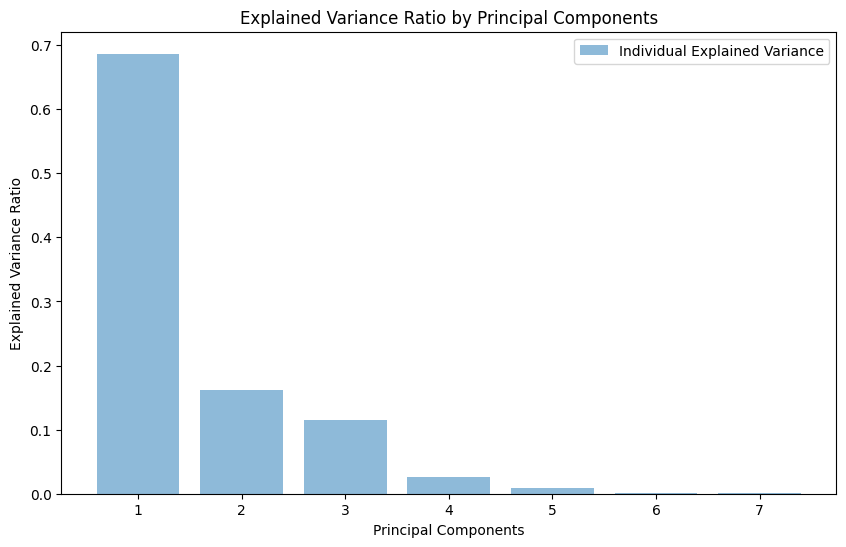

In [289]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Extract numeric features
# X = seed_data.iloc[:, 1:]  # Exclude the first column if it's non-numeric
# Y = seed
numerical = ['area', 'perimeter', 'lengthOfKernel', 'widthOfKernel', 'compactness', 'asymmetryCoefficient', 'lengthOfKernelGroove']
x = seed_data.loc[:, numerical].values
y = seed_data.loc[:, ['seedType']].values

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(x)

# Perform PCA
pca = PCA()
pca.fit(X_std)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the explained variance by each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend()
plt.show()


***OBSERVATION***<BR>
The above bar plot visualizes the explained variance ratio for each principal component. As more principal components are taken into consideration, the variance returns diminish.


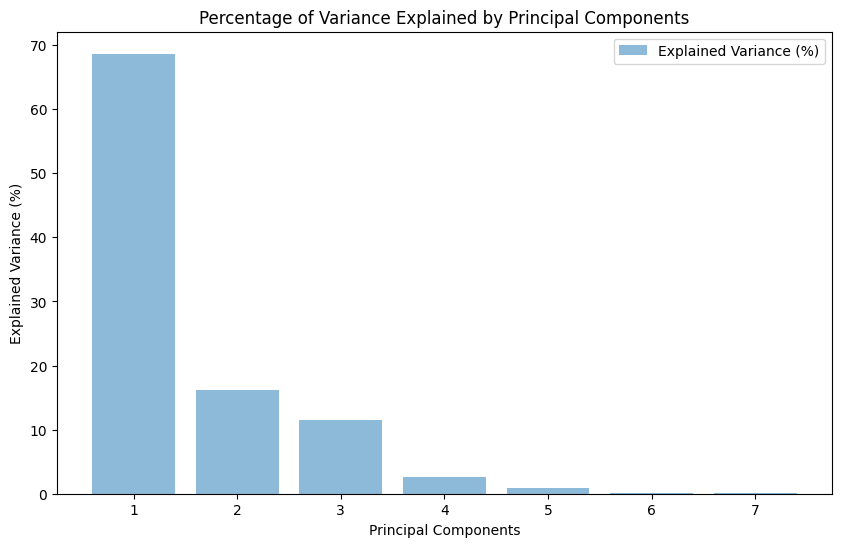

In [290]:
# Calculate the explained variance ratios and convert to percentages
explained_variance_percentages = explained_variance * 100

# Plot the explained variance as percentages
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_percentages) + 1), explained_variance_percentages, alpha=0.5, align='center', label='Explained Variance (%)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.title('Percentage of Variance Explained by Principal Components')
plt.legend()
plt.show()


***OBSERVATION*** <br>
The above bar plot represents the percentage of variance explained by a principal component. This visualization provides a better understanding of the variablity of the data.

***plotting the principal components of interest and reporting observations and limitations:***

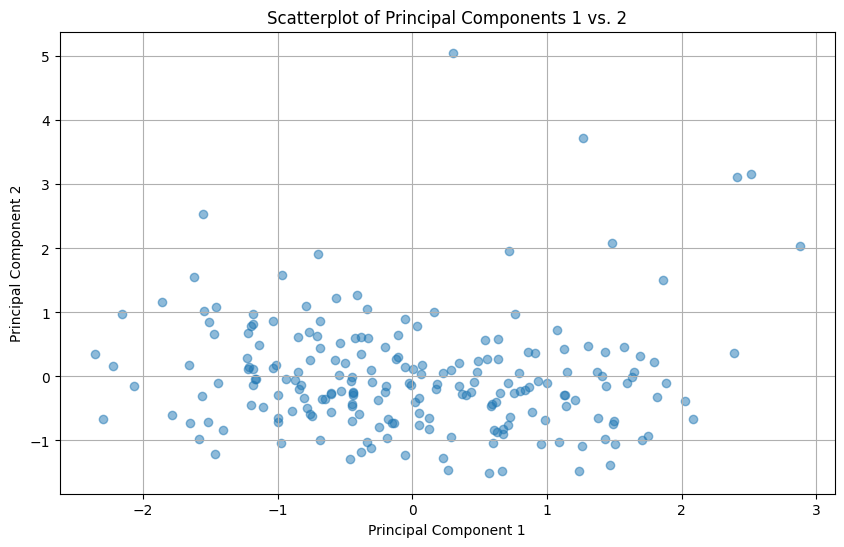

In [291]:
# Specify the number of principal components to visualize
components_to_visualize = [1, 2]  #(PC1 and PC2)

# Calculate the PCA components for the selected components
selected_components = pca.transform(X_std)[:, components_to_visualize]

# Create a scatterplot for the selected components
plt.figure(figsize=(10, 6))
plt.scatter(selected_components[:, 0], selected_components[:, 1], alpha=0.5)
plt.xlabel(f'Principal Component {components_to_visualize[0]}')
plt.ylabel(f'Principal Component {components_to_visualize[1]}')
plt.title(f'Scatterplot of Principal Components {components_to_visualize[0]} vs. {components_to_visualize[1]}')
plt.grid(True)
plt.show()


***OBSERVATIONS*** <br>

The above scatterplot visualizes the relationship between PC1 and PC2. The values are concentrated in the range of -2 and 2 on x axis. This suggests that the principal components are appropriately scaled and effectively capture the essential information in the data without being dominated by extremely large or small values. 


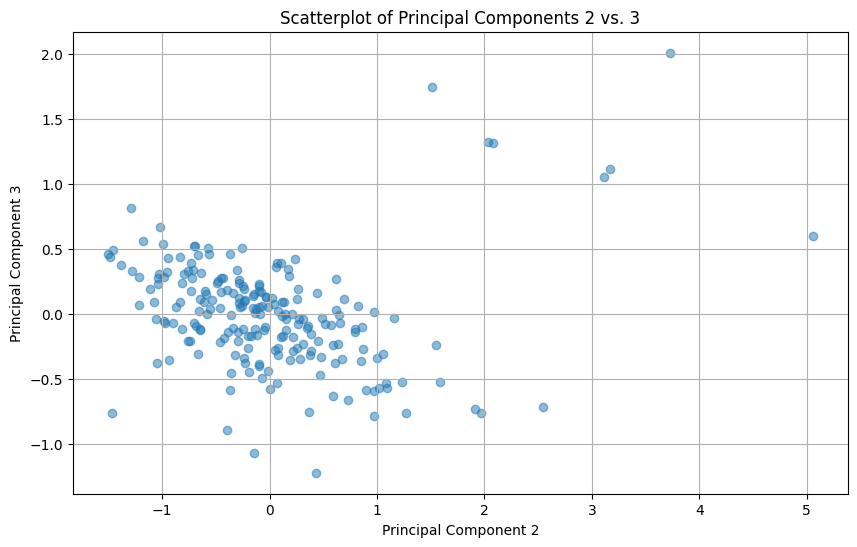

In [292]:
# Specify the number of principal components to visualize
components_to_visualize = [2, 3]  #(PC2 and PC3)

# Calculate the PCA components for the selected components
selected_components = pca.transform(X_std)[:, components_to_visualize]

# Create a scatterplot for the selected components
plt.figure(figsize=(10, 6))
plt.scatter(selected_components[:, 0], selected_components[:, 1], alpha=0.5)
plt.xlabel(f'Principal Component {components_to_visualize[0]}')
plt.ylabel(f'Principal Component {components_to_visualize[1]}')
plt.title(f'Scatterplot of Principal Components {components_to_visualize[0]} vs. {components_to_visualize[1]}')
plt.grid(True)
plt.show()


***OBSERVATIONS*** <br>
Here the data points range between -1 and 1 on x axis suggesting that the principal components are well scaled, balanced in their contributions from the original features, and effectively capture the essential variance in the data.

***Limitations:*** <br> <BR>

* **Limited to Two Components:**<br>
This approach visualizes only two principal components at a time, making it suitable for 2D scatterplots. If you are interested in exploring relationships in higher-dimensional spaces, you may need to use techniques like dimensionality reduction or other visualization methods.<br> <BR>

* **Loss of Dimensionality:**<br> 
By visualizing only a subset of principal components, you lose information contained in the other components. The choice of which components to visualize should be based on your specific analysis goals.<br> <BR>

* **Interpretability:**<br>
Principal components may not have straightforward interpretations in terms of the original features. While you can analyze their loadings to understand their contributions, the meaning of each component may not always be clear.<br> <BR>

* **Data Scaling:**<br>
PCA assumes that the data is scaled appropriately. Make sure your data is standardized or scaled before applying PCA to ensure meaningful results.<br> <BR>

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**